## Bond Yield
---

Let $V(t)$ denote the price of a zero-coupon bond that will mature at time $t$ ($0<t\leqq T$). The <font color=red>yield to maturity</font> (<font color=red>YTM</font>) or simply <font color=red>yield</font>, denoted by $y(t)$, is defined as
$$
 y(t) = \begin{cases}
 \displaystyle
 \left(\frac{F}{V(t)}\right)^{\frac1{t}} - 1, & (\text{one-year compound}) \\
 \displaystyle
 \frac1{t}\log\frac{F}{V(t)}, & (\text{continuous compound}) \\
 \end{cases}
$$

The yield to maturity of a coupon-bearing bond is the internal rate of return on its cash flow. In this context, $y(t)$ must be constant for any $t$, though $y$ is time-varying in reality. Therefore the yield $y(t)$ is the real-valued solution of the following polynomial equation.
\begin{align*}
 P(0) &= C\sum_{t=1}^{T-1}B(t,y) + (C+F)B(T,y), \\
 B(t,y) &= \begin{cases}
 \displaystyle
 \frac{1}{(1+y)^t}, & (\text{one-year compound}) \\
 \displaystyle
 e^{-yt}, & (\text{continuous compound}) \\
 \end{cases}
\end{align*}


In [1]:
%matplotlib inline
import numpy as np
import numpy.polynomial.polynomial as pol
import matplotlib.pyplot as plt

The function `Bond_Yield` computes the bond yield.

In [2]:
def Bond_Yield(Price, Maturity, CouponRate, FaceValue):
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.hstack((-Price, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon))
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = np.asscalar(Real[Real > 0.0])
    return (1.0 / Positive - 1.0) * 100

The function `Bond_Price` computes the bond price.

In [3]:
def Bond_Price(Yield, Maturity, CouponRate, FaceValue):
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.hstack((0.0, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon))
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), CF)

In [4]:
P_A = Bond_Price(7, 7, 5, 100)
Y_B = Bond_Yield(98, 5, 5, 100)
print([P_A, Y_B])

[89.2214211967026, 5.4679412068092015]


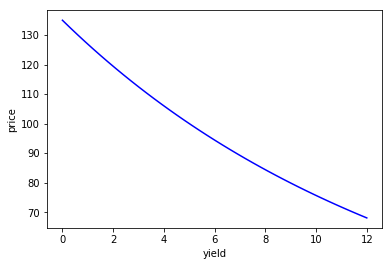

In [5]:
V_Yield = np.linspace(0, 12, 41)
V_Price = np.array([Bond_Price(Yield, 7, 5, 100) for Yield in V_Yield])
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(V_Yield, V_Price, 'b-')
plt.xlabel('yield')
plt.ylabel('price')
plt.show()

## Duration and Convexity
---

The price sensitivity to a infinitesimally small shift in the yield curve is given by

\begin{align*}
 \frac{\nabla_y P(y)}{P(y)}
 &= \begin{cases}
 \displaystyle
 -\frac{D(y)}{1+y}, &  (\text{one-year compound}) \\
 & \\
 \displaystyle
 -D(y), & (\text{continuous compound}) \\
 \end{cases} \\ \\
 D(y) &= \frac{C\sum_{t=1}^T tB(t,y) + FTB(T,y)}{P(y)}.
\end{align*}

$D(y)$ is called the <fond color=red>duration</font>.

The following cell defines a function to compute the duration of a coupon-bearing bond.

In [6]:
def Bond_Duration(Yield, Maturity, CouponRate, FaceValue):
    Price = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.hstack((np.tile(Coupon, int(Maturity) - 1), Coupon + FaceValue))
    Coef = np.linspace(1, Maturity, Maturity) * CF
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), np.r_[0.0, Coef]) / Price

The <font color=red>convexity</font> $C(y)$ is defined as

\begin{align*}
 C(y) &= \frac{\nabla_y^2 P(y)}{P(y)}
 = \frac{S(y) + (1 + D(y))D(y)}{(1+y)^2},\ (\text{one-year compound}) \\
 & \\
 S(y) &= \frac{C\sum_{t=1}^T(t-D(y))^2B(t,y)+F(T-D(y))^2B(T,y)}{P(y)},
\end{align*}

where $S(y)$ is called the <font color=red>dispersion</font>.


The following cell defines a function to compute the convexity of a coupon-bearing bond

In [7]:
def Bond_Convexity(Yield, Maturity, CouponRate, FaceValue):
    Price = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    Duration = Bond_Duration(Yield, Maturity, CouponRate, FaceValue)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.hstack((np.tile(Coupon, int(Maturity) - 1), Coupon + FaceValue))
    Coef = (np.linspace(1, Maturity, Maturity) - Duration)**2 * CF
    Dispersion = pol.polyval(1.0 / (1.0 + 0.01 * Yield), np.r_[0.0, Coef]) \
                 / Price
    return (Dispersion + (1.0 + Duration) * Duration) / (1.0 + 0.01 * Yield)**2

In [8]:
P_A = Bond_Price(5, 10, 7, 100)
P_B = Bond_Price(5, 8, 0.9, 100)
D_A = Bond_Duration(5, 10, 7, 100)
D_B = Bond_Duration(5, 8, 0.9, 100)
C_A = Bond_Convexity(5, 10, 7, 100)
C_B = Bond_Convexity(5, 8, 0.9, 100)
print([P_A, P_B, D_A, D_B, C_A, C_B])

[115.4434698583696, 73.50082768635235, 7.705327414925867, 7.7027886687199825, 69.7275539663588, 62.10963633984605]


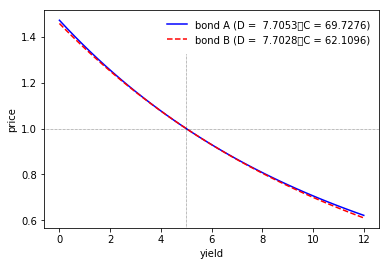

In [9]:
V_Yield = np.linspace(0, 12, 41)
V_Price_A = np.array([Bond_Price(Yield, 10, 7, 100) for Yield in V_Yield])
V_Price_B = np.array([Bond_Price(Yield, 8, 0.9, 100) for Yield in V_Yield])
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(V_Yield, V_Price_A / P_A, 'b-')
plt.plot(V_Yield, V_Price_B / P_B, 'r--')
plt.axhline(1, color='k', linestyle=':', linewidth=0.5)
plt.axvline(5, ymin=0, ymax=0.8, color='k', linestyle=':', linewidth=0.5)
plt.xlabel('yield')
plt.ylabel('price')
Legend_A = 'bond A (D ={0:8.4f}，C ={1:8.4f})'.format(D_A, C_A)
Legend_B = 'bond B (D ={0:8.4f}，C ={1:8.4f})'.format(D_B, C_B)
plt.legend([Legend_A, Legend_B], loc='best', frameon=False)
plt.show()

`numpy.linalg` is a module in NumPy that provides functions for matrix manupilations.

In [10]:
import numpy.linalg as la

The following cell creates a figure of bond yield curves

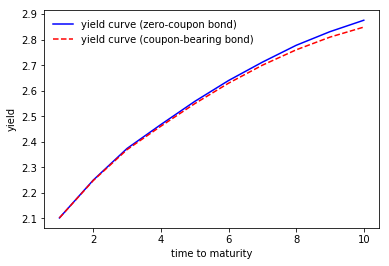

In [11]:
Bond = np.array([
    [ 99.90,  1, 2.0],
    [100.10,  2, 2.3],
    [100.66,  3, 2.6],
    [ 99.77,  4, 2.4],
    [ 98.38,  5, 2.2],
    [ 96.00,  6, 1.9],
    [ 93.70,  7, 1.7],
    [ 95.32,  8, 2.1],
    [ 95.21,  9, 2.2],
    [ 97.00, 10, 2.5]
])
F = 100
Yield = np.array([Bond_Yield(Bond[idx,0], Bond[idx,1], Bond[idx,2], F)
                  for idx in range(0, Bond.shape[0])])
P = Bond[:,0]
C = F * np.identity(Bond.shape[0]) \
    + np.tril(np.transpose(np.tile(0.01 * Bond[:, 2] * F, (Bond.shape[0], 1))))
V = la.solve(C, P)
ZeroRate = (np.power(1.0 / V, 1.0 / Bond[:, 1]) - 1.0) * 100
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(Bond[:,1], ZeroRate, 'b-')
plt.plot(Bond[:,1], Yield, 'r--')
plt.xlabel('time to maturity')
plt.ylabel('yield')
plt.legend(['yield curve (zero-coupon bond)',
            'yield curve (coupon-bearing bond)'], loc='best', frameon=False)
plt.show()